<h1><center>Laboratorio 5: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla
- Auxiliar: Ignacio Meza D.
- Ayudante: Constanza Peña

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Sebastián Rojas


### **Link de repositorio de GitHub:** `https://github.com/sebarojasmorales/MDS7202`

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

# Temas a tratar

- Programación orientada a objetos.
- Programación funcional.
- Librería Numpy para manejo de datos en arreglos/tensores.

## Reglas:

- Fecha de entrega: 22/10/2021
- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [75]:
# Libreria Core del lab.
import numpy as np
!pip install --upgrade pandas
!pip install xlrd
!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Acceso denegado: 'c:\\programdata\\anaconda3\\lib\\site-packages\\pandas-1.1.3.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.




  Using cached pandas-1.3.4-cp38-cp38-win_amd64.whl (10.2 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.3
    Uninstalling pandas-1.1.3:
Requirement already up-to-date: plotly in c:\programdata\anaconda3\lib\site-packages (5.3.1)


<p align="center"><iframe width="560" height="315" src="https://www.youtube.com/embed/MW4d8_LLYp8?rel=0&amp;controls=0&amp;showinfo=0" frameborder="1" allowfullscreen></iframe></p>

# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas y si es posible extraer los diferenciar los tipos de clientes que posee el retail.

Para esto, el área de ventas les entrega el archivo `online_retail_II.xlsx` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [76]:
df_retail = pd.read_pickle("online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head(100)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
95,489441,22111,SCOTTIE DOG HOT WATER BOTTLE,48,2009-12-01 09:44:00,4.25,18087.0,United Kingdom
96,489442,21955,UNION JACK GUNS & ROSES DOORMAT,2,2009-12-01 09:46:00,6.75,13635.0,United Kingdom
97,489442,22111,SCOTTIE DOG HOT WATER BOTTLE,3,2009-12-01 09:46:00,4.95,13635.0,United Kingdom
98,489442,22296,HEART IVORY TRELLIS LARGE,12,2009-12-01 09:46:00,1.65,13635.0,United Kingdom


## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

El análisis univariable consiste en analizar cada una de las columnas (variables) por separado, ver si faltan datos y ver la consistencia de sus valores según su naturaleza. Por otro lado, el análisis multivariable consiste en estudiar las relaciones existentes entre las distintas variables, y con ello, se puede estudiar si los datos faltantes se deben a la dependencia con otra variable. Estudiar todo esto permite conocer errores y limitaciones a considerar a la hora de trabajar con los datos, además de tener una idea general de como se distribuyen y se relacionan, y así obtener interpretaciones más correctas.

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [77]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe(datetime_is_numeric=True)])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns={"index": serie.name, serie.name: "Count"})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [78]:
profile_serie(df_retail['Invoice']) 

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2592298 bytes
dtype: object

Se puede observar que en la variable 'Invoice' no hay datos faltantes, que es lo más importante en este caso. Es difícil apreciar si existe algún tipo de error (distinto a datos faltantes) para esta variable, por lo que no se sugiere limpieza. Se puede observar que en la compra con la factura 537434 se obtuvo la mayor cantidad de productos distintos, con 675. 

In [79]:
profile_serie(df_retail['Description'])

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

En la variable 'Description', tal como en la variable anterior, no se tienen datos faltantes, y es difícil analizar otro error debido a la naturaleza de la variable, por lo que tampoco se sugiere alguna limpieza. Como dato, se tiene que el producto 'WHITE HANGING HEART T-LIGHT HOLDER' es el que fue comprado más veces en diferentes facturas, apareciendo en un total de 3549 facturas distintas. 

In [80]:
profile_serie(df_retail['Quantity'])

## Quantity Profile

Type                              int64
Number of observations           525461
Mean                            10.3377
Std                             107.424
Min                               -9600
25%                                   1
50%                                   3
75%                                  10
Max                               19152
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                            6277.67
Skew                            36.0446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

Para la variable 'Quantity' se tienen errores evidentes, los cuales son que existen 12326 filas con cantidades negativas, lo cual no tiene sentido pues no se pueden comprar unidades negativas de productos. Es por esto que se sugiere limpiar esta columna, dejando solamente las filas con unidades mayores a 1 (0 unidades tampoco se considera con sentido, y deben ser enteras). 

Además, se puede observar que existen datos muy grandes atípicos, pues el último cuartil abarca desde 10 hasta 19152, lo cual es un rango extremadamente grande en comparación al donde se concentra la mayor cantidad de datos. Sin embargo, no se sugiere limpieza pues no se sabe con exactitud  si son datos erróneos o reales, o desde que punto no se deben considerar (pues para el gráfico, los outliers se calculan a través de una muestra aleatoria de los datos, por lo que cambiarían constantemente al cambiar la muestra).

In [81]:
profile_serie(df_retail['InvoiceDate'])

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.844746240
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

La variable 'InvoiceDate' no presenta datos faltantes, y al ser de tipo datetime se asume que no hay datos en otro formato. Además, no existe algún tipo de "outlier" para esta variable, como por ejemplo un día muy lejano o muy anterior al resto, por lo que no se sugiere limpieza. 

In [82]:
profile_serie(df_retail['Price'])

## Price Profile

Type                            float64
Number of observations           525461
Mean                            4.68883
Std                             146.127
Min                            -53594.4
25%                                1.25
50%                                 2.1
75%                                4.21
Max                             25111.1
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                            64868.3
Skew                           -140.768
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

Para la variable 'Price' se observan datos negativos, lo que no tiene sentido, por lo que se sugiere considerar solamente las filas con valores positivos. Tal como para la variable 'Quantity', se observan datos atípicos mucho más grandes que la mayoría, pero por el mismo motivo detallado anteriormente, no se sugiere una limpieza para este posible error.

In [83]:
profile_serie(df_retail['Customer ID'])

## Customer ID Profile

Type                           category
Number of observations           417534
Unique                             4383
Top                               14911
Freq                               5710
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1249954 bytes
dtype: object

Para la variable 'CustomerID' se aprecia, por primera vez en el dataset, datos faltantes. Se sugiere limpiar estos datos, pues no habría una relación con otras variables que permitan explicar estos valores nulos, y una venta correcta debe tener un vendedor asociado, por lo que se sugiere no considerarlos.

In [84]:
profile_serie(df_retail['Country'])

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

Por último, la variable 'Country' no posee celdas faltantes, por lo que no se sugiere limpieza. Se puede observar que la gran mayoría de las compras fueron realizadas en United Kingdom.

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [85]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df.corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

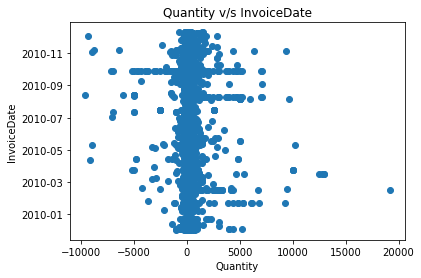

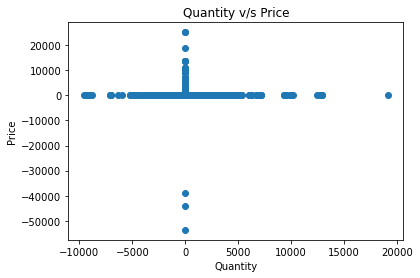

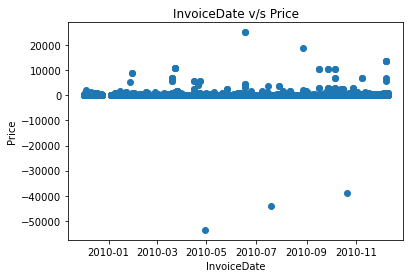

## Correlation:

## Missing Matrix:

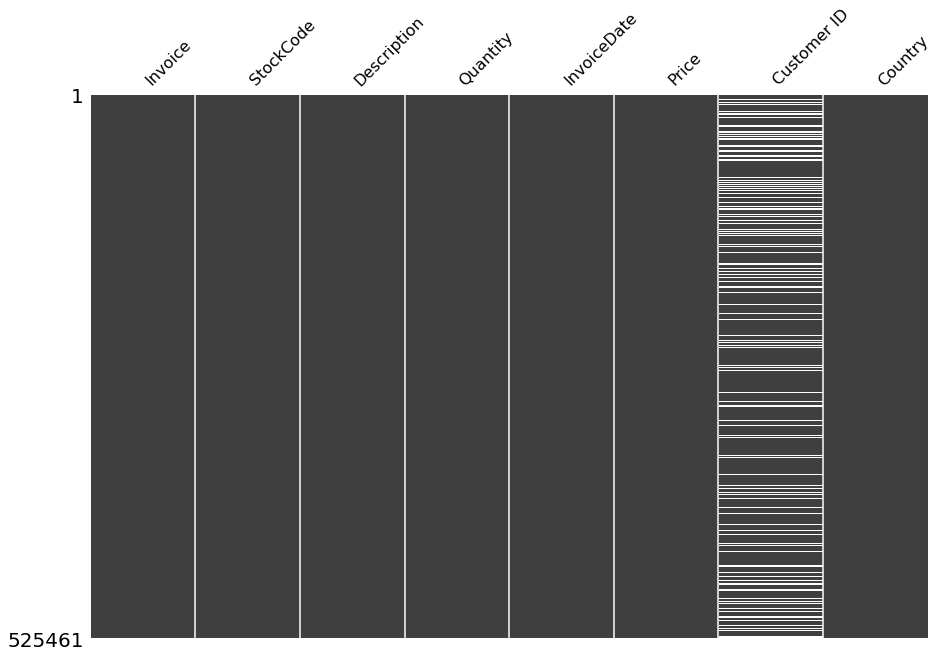

In [86]:
profile_df(df_retail)

Se observa que los datos faltantes ('CustomerID') no se explican a través de su relación con otra variable, por lo que se sugiere no considerarlos.

Por otro lado, se puede observar que las variables numéricas 'Quantity' y 'Price' no poseen correlación (coeficiente igual a 0).

Por último, del análisis multivariable se observa que al parecer los outliers de la variable 'Price' están ligados a ventas con 'Quantity' 0 (o muy cercanos a 0), lo que como se dijo anteriormente, carece de sentido, por lo que se pueden considerar como datos erróneos, y se confirma la sugerencia de una limpieza para ellos. Para la relación entre las fechas y las variables numéricas ('Price' y 'Quantity'), se observa que la distribución es similar para todas las fechas, pero se pueden apreciar outliers en algunos puntos, por ejemplo los valores negativos.

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [87]:
def clean_data(dataframe):
    df=dataframe.copy()
    df=df[df['Price']>0]
    df=df[df['Quantity']>=1]
    df=df.dropna()
    return df

df_retail=clean_data(df_retail)

## Invoice Profile

Type                           category
Number of observations           407664
Unique                            19213
Top                              500356
Freq                                270
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   405936
Duplicate rows (%)              99.58 %
Total size in memory      5617888 bytes
dtype: object

## StockCode Profile

Type                           category
Number of observations           407664
Unique                             4017
Top                              85123A
Freq                               3153
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   407506
Duplicate rows (%)              99.96 %
Total size in memory      4277536 bytes
dtype: object

## Description Profile

Type                                                  object
Number of observations                                407664
Unique                                                  4444
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3153
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        407462
Duplicate rows (%)                                   99.95 %
Total size in memory                           6522624 bytes
dtype: object

## Quantity Profile

Type                              int64
Number of observations           407664
Mean                            13.5856
Std                             96.8407
Min                                   1
25%                                   2
50%                                   5
75%                                  12
Max                               19152
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                            9572.06
Skew                            79.9177
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   407550
Duplicate rows (%)              99.97 %
Total size in memory      6522624 bytes
dtype: object

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           407664
Mean                      2010-07-01 10:15:11.871550720
Min                                 2009-12-01 07:45:00
25%                                 2010-03-26 14:01:00
50%                                 2010-07-09 15:47:00
75%                                 2010-10-14 17:09:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   406199
Duplicate rows (%)                              99.64 %
Total size in memory                      6522624 bytes
dtype: object

## Price Profile

Type                            float64
Number of observations           407664
Mean                            3.29444
Std                              34.758
Min                               0.001
25%                                1.25
50%                                1.95
75%                                3.75
Max                             10953.5
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                            63865.3
Skew                            235.067
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   407478
Duplicate rows (%)              99.95 %
Total size in memory      6522624 bytes
dtype: object

## Customer ID Profile

Type                           category
Number of observations           407664
Unique                             4312
Top                               14911
Freq                               5570
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   407573
Duplicate rows (%)              99.98 %
Total size in memory      4275544 bytes
dtype: object

## Country Profile

Type                              object
Number of observations            407664
Unique                                37
Top                       United Kingdom
Freq                              370929
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    407664
Duplicate rows (%)               100.0 %
Total size in memory       6522624 bytes
dtype: object

## Bivariant Analysis:

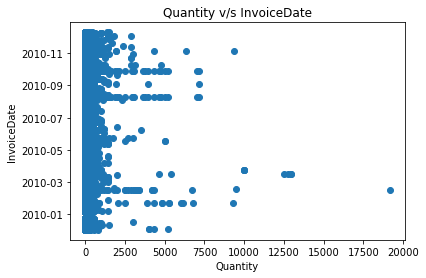

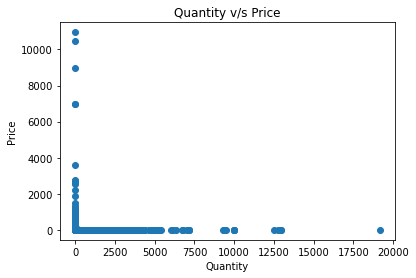

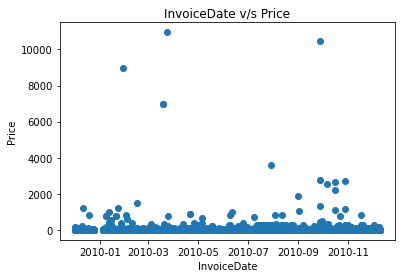

## Correlation:

## Missing Matrix:

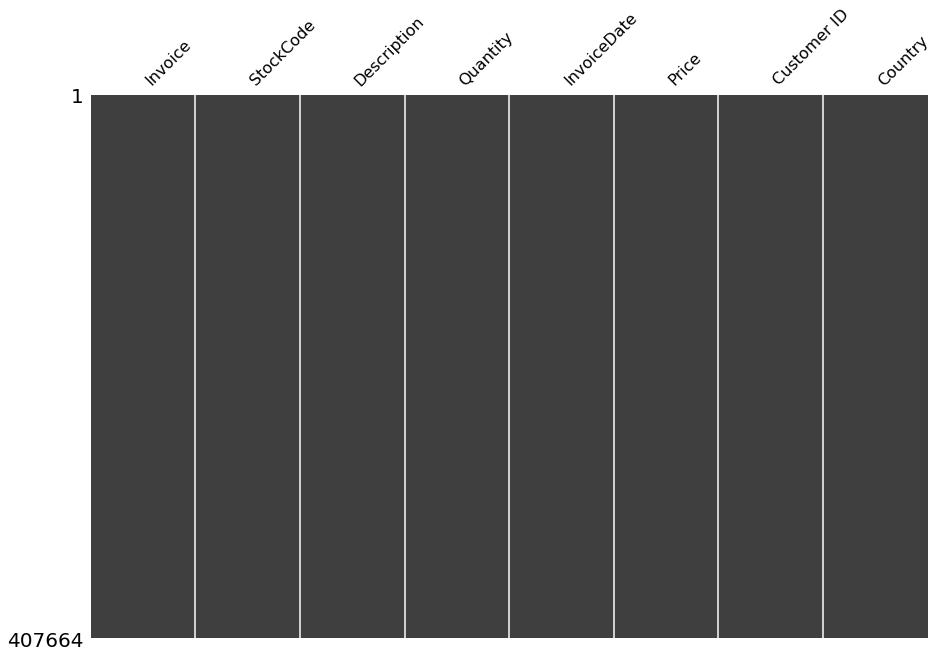

In [88]:
profile_serie(df_retail['Invoice']) 
profile_serie(df_retail['StockCode'])
profile_serie(df_retail['Description']) 
profile_serie(df_retail['Quantity'])
profile_serie(df_retail['InvoiceDate'])
profile_serie(df_retail['Price'])
profile_serie(df_retail['Customer ID'])
profile_serie(df_retail['Country'])

profile_df(df_retail)

Con este nuevo análisis se puede observar que se redujo el número de observaciones a 407664, eliminando una gran cantidad de datos que no tenían sentido. Para las variables a las que no se les sugirió limpieza, se pueden observar los mismos comportamientos generales (ahora con menos datos, pero no se pierde el análisis hecho anteriormente).

Para la variable 'Price' se puede observar que se eliminaron los valores negativos, y los outliers grandes se redujeron considerablemente. Es más, con el primer análisis se sugería que los datos sin outliers  de la muestra llegaban hasta el valor 120 apróx, mientras que eliminando los datos sin sentido se llegó a valores menores a 50. Así, se obtienen valores mucho más confiables, y se pone en evidencia que eliminar los outliers simplemente por su valor utilizando una muestra (como en el gráfico del análisis pre-limpieza) puede ser equivocado, pues por ejemplo, si sólo se hubiesen eliminados datos de la variable 'Price' dejando los no outliers sugeridos, de todas formas se hubiesen obtenido valores posiblemente irreales (rango 50 a 120).

Para la variable 'Quantity' se eliminaron los valores menores a 1, lo que genera datos más confiables para trabajar. Además, para la variable 'CustomerID', y con ello para todo el dataset, ya no existen valores nulos.

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [89]:
def top30_ingresos(dataframe):
    df=dataframe.copy()
    df['Ingresos']=df['Quantity']*df['Price']
    df=df.groupby(['Description']).sum()
    df=df.sort_values(by='Ingresos',ascending=False)
    df2=df.sort_values(by='Quantity',ascending=False)
    fig1=px.bar(df.head(30)['Ingresos'],title='30 productos que generan más ingresos')
    fig1.show()
    fig2=px.bar(df2.head(30)['Quantity'],title='30 productos más vendidos')
    fig2.show()

In [90]:
top30_ingresos(df_retail)

Comparando los productos que generan mayores ingresos con los que tienen más unidades vendidas, se puede observar que si bien el producto más vendido es el mismo que genera más ganancias (WHITE HANGING HEART T-LIGHT HOLDER), ambas categorías no son compartidas por exactamente los mismos productos. En efecto, los prodcutos que se repiten entre los 30 más vendidos y los 30 que generan más ingresos son menores a 10 (6 tomando los gráficos mostrados anteriormente).

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [91]:
def plot_ventas(dataframe):
    df=dataframe.copy()
    df['InvoiceDate']=df['InvoiceDate'].apply(lambda x : x.strftime("%Y-%m-%d"))
    df=df.groupby('InvoiceDate').sum()
    fig=px.line(df['Quantity'],title='Cantidad de productos vendidos por día')
    fig.show()

In [92]:
plot_ventas(df_retail)

Se puede observar que las ventas oscilan, pero curiosamente hay peaks muy altos en algunos días puntuales que resultan extraños. Es probable que lo anterior se deba a los outliers de la variable 'Quantity' mencionados.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab** solo para tareas. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>